# RFM Segmentation

In [1]:
import numpy as np
import datetime as dt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## TASK 1: Understanding & preparing the dataset

### 1.1) Reading and copying data

In [2]:
# initial data (before any alteration)
initial_df = pd.read_excel("online_retail_II.xlsx", sheet_name="Year 2010-2011")
df = initial_df.copy()  # in order not to make any change on our actual data

In [3]:
df.head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.tail(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France
541909,581587,POST,POSTAGE,1,2011-12-09 12:50:00,18.00,12680.0,France


### 1.2) Descriptive analysis

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541910.0,9.552234,218.080957,-80995.00,1.00,3.00,10.00,80995.0
Price,541910.0,4.611138,96.759765,-11062.06,1.25,2.08,4.13,38970.0
Customer ID,406830.0,15287.684160,1713.603074,12346.00,13953.00,15152.00,16791.00,18287.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      541910 non-null  object        
 1   StockCode    541910 non-null  object        
 2   Description  540456 non-null  object        
 3   Quantity     541910 non-null  int64         
 4   InvoiceDate  541910 non-null  datetime64[ns]
 5   Price        541910 non-null  float64       
 6   Customer ID  406830 non-null  float64       
 7   Country      541910 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
df.shape

(541910, 8)

In [8]:
df.dtypes

Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object

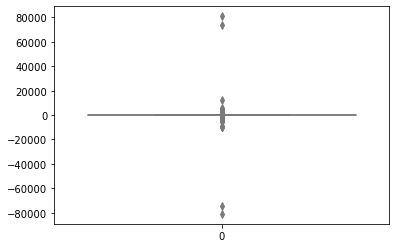

In [9]:
# checking out the outliers
ax = sns.boxplot(data=df["Quantity"], orient="v", palette="pastel")

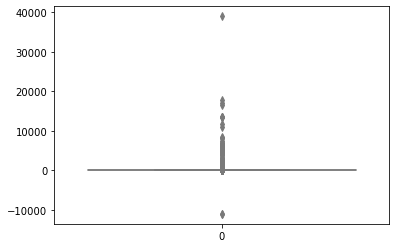

In [10]:
ax = sns.boxplot(data=df["Price"], orient="v", palette="pastel")

In [11]:
df.quantile([0, 0.01, 0.05, 0.50, 0.95, 0.99, 1]).drop("Customer ID", axis = 1)
# After this observation, it's obvious that dataset is not very normal
# due to negative values, but it will be covered in the 1.8 section.

,Quantity,Price
0.00,-80995.0,-11062.06
0.01,-2.0,0.19
0.05,1.0,0.42
0.50,3.0,2.08
0.95,29.0,9.95
0.99,100.0,18.00
1.00,80995.0,38970.00


### 1.3) Checking out null values 

In [12]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
Price               0
Customer ID    135080
Country             0
dtype: int64

<AxesSubplot:>

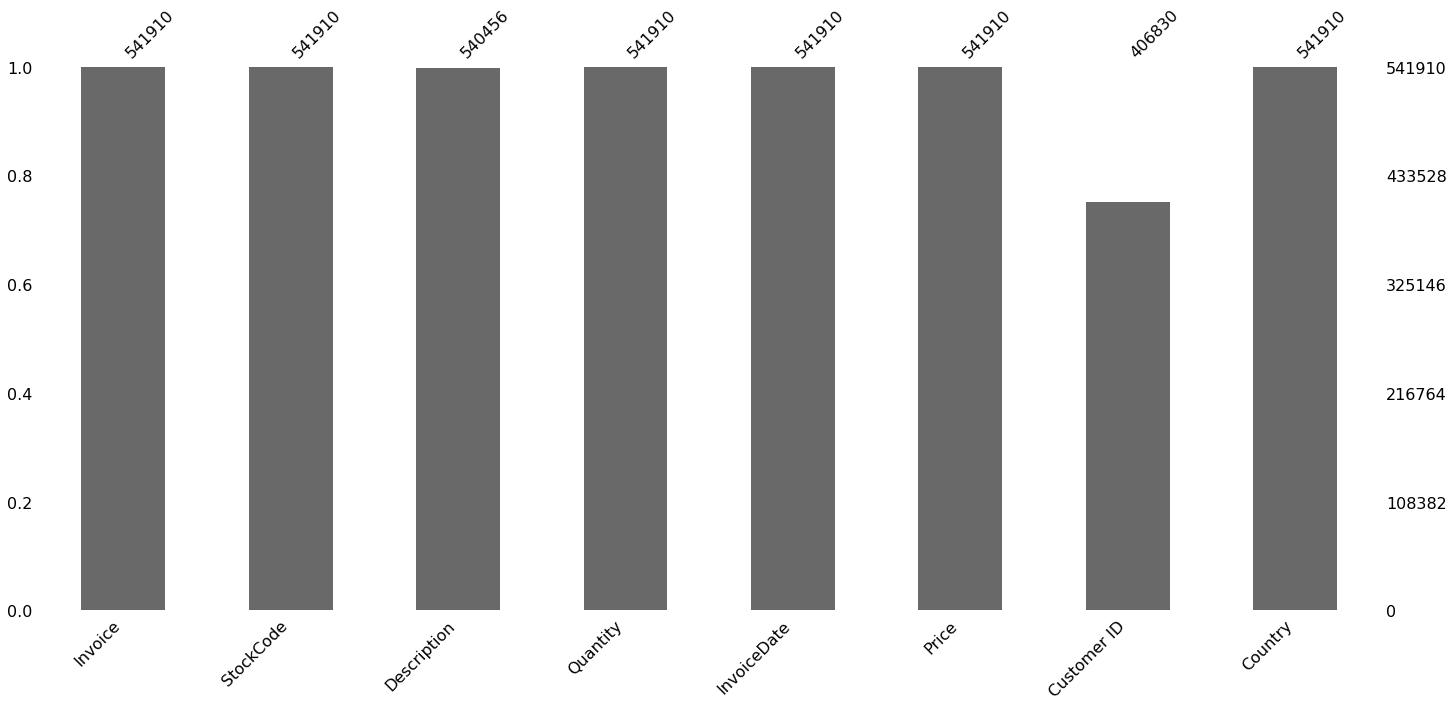

In [13]:
#checking out if there's any correlation between null values

import missingno as msno
msno.bar(df)

<AxesSubplot:>

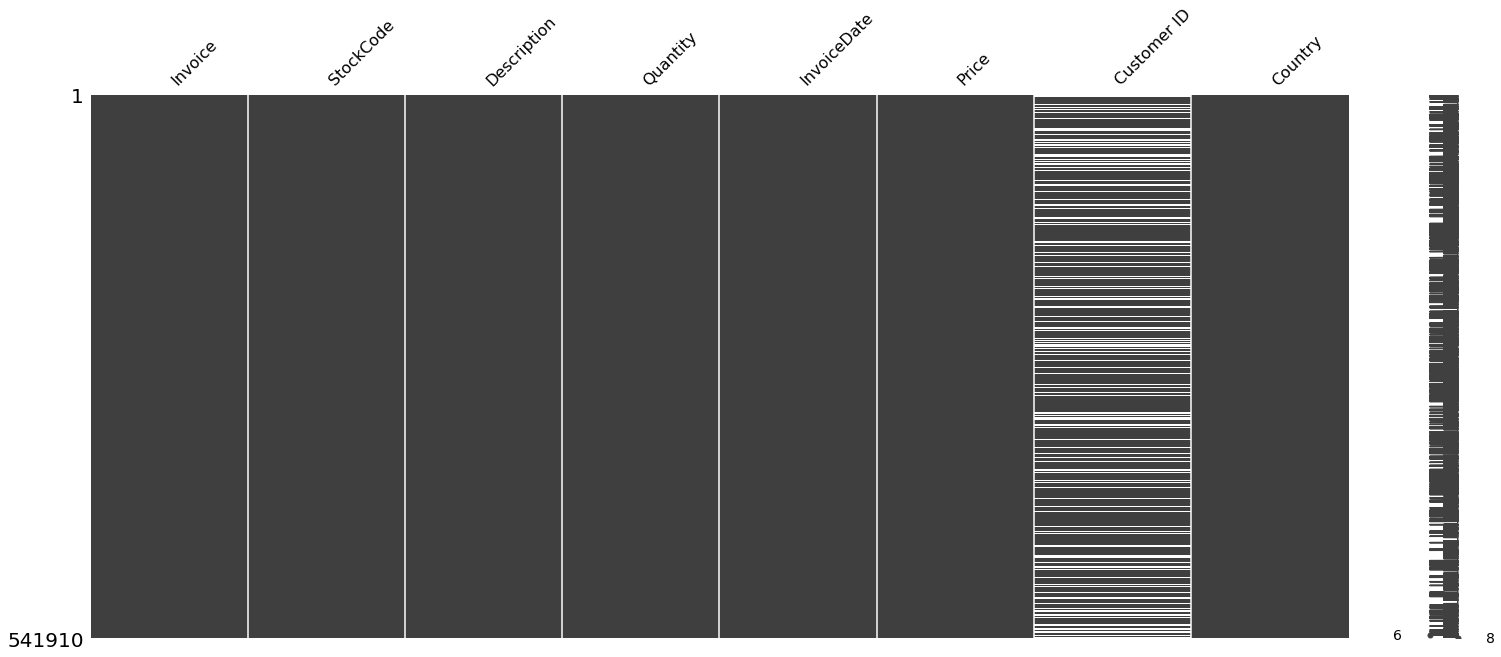

In [14]:
msno.matrix(df)

### 1.4) Deleting null values 

In [15]:
df.dropna(inplace=True)
df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

### 1.5) Number of unique products

In [16]:
df['Description'].nunique()

3896

### 1.6) Number of each products

In [17]:
df['Description'].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER    2070
REGENCY CAKESTAND 3 TIER              1905
JUMBO BAG RED RETROSPOT               1662
ASSORTED COLOUR BIRD ORNAMENT         1418
PARTY BUNTING                         1416
                                      ... 
CURIOUS IMAGES SCRAP BOOK SET            1
ENAMEL MUG PANTRY                        1
WHITE CHRISTMAS FLOCK DROPLET            1
WALL ART,ONLY ONE PERSON                 1
PINK/AMETHYST/GOLD NECKLACE              1
Name: Description, Length: 3896, dtype: int64

### 1.7) The most ordered 5 products

In [18]:
df.groupby("Description").agg({"Quantity" : "sum"}).sort_values("Quantity", ascending = False).head(5)
# aggregating sum of quantity with description column to indicate the number of sold products

,Quantity
Description,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,53215
JUMBO BAG RED RETROSPOT,45066
ASSORTED COLOUR BIRD ORNAMENT,35314
WHITE HANGING HEART T-LIGHT HOLDER,34147
PACK OF 72 RETROSPOT CAKE CASES,33409


### 1.8) Sweeping out Invoices that starts with letter 'C'

In [19]:
df = df[~df["Invoice"].str.contains("C" , na = False)]

### 1.9) TotalPrice calculation 

In [20]:
# no. of total price earned each invoice
df["TotalPrice"] = df["Price"] * df["Quantity"]

In [21]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


## TASK 2: Calculation of RFM Metrics

### 2.1) Recency, Frequency, Monetary definitions 

#### RFM

RFM stands for Recency, Frequency, and Monetary value, each corresponding to some key customer trait. These RFM metrics are important indicators of a customer’s behavior because frequency and monetary value affects a customer’s lifetime value, and recency affects retention, a measure of engagement.

#### Recency

The value that indicates how much time has passed since a customer's last activity or transaction with the brand. The activity is usually a purchase, but sometimes variations are used such as the last visit to a website or the use of a mobile app.

#### Frequency

It indicates how often a customer makes a purchase. Customers that show up more might be more loyal than the other segments.

#### Monetary 

It is the value that indicates the amount of money a customer has spent in a certain period of time. By dividing out the value of money spent over frequency indicates the average purchase amount.

### 2.2 & 2.3) Calculating RFM Metrics

In [22]:
df['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [23]:
#could've picked df['InvoiceDate'].max() as the last but it's better if we pick the day after.
lastDate = dt.datetime(2011, 12, 10)
lastDate

datetime.datetime(2011, 12, 10, 0, 0)

In [24]:
# by matching up the Customer ID, rfm values are calculated.
rfm = df.groupby('Customer ID', as_index = False).agg({'InvoiceDate': lambda x: (lastDate - x.max()).days, # recency
                                     'Invoice': lambda y: y.nunique(), # frequency
                                     'TotalPrice': lambda z: z.sum()}) # monetary

In [25]:
rfm.columns

Index(['Customer ID', 'InvoiceDate', 'Invoice', 'TotalPrice'], dtype='object')

### 2.4) Renaming the columns 

In [26]:
rfm.columns = ["Customer ID", "Recency","Frequency","Monetary"]
rfm
rfm = rfm[rfm["Monetary"]>0]
rfm.head()

,Customer ID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,18,1,1757.55
4,12350.0,310,1,334.40


## TASK 3: Setting up RFM Scores 

### 3.1) Scoring RFM values with 'qcut' 

In [27]:
r_labels = [1,2,3,4,5]
f_labels = range(6,1)
m_labels = range(1,6)
rfm["recency_score"]=pd.qcut(rfm["Recency"], 5, labels=[5,4,3,2,1])
rfm["frequency_score"]=pd.qcut(rfm["Frequency"].rank(method="first"), 5, labels=[1,2,3,4,5])
rfm["monetary_score"]=pd.qcut(rfm["Monetary"], 5, labels=[1,2,3,4,5])

In [28]:
rfm.head()

,Customer ID,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score
0,12346.0,325,1,77183.60,1,1,5
1,12347.0,2,7,4310.00,5,5,5
2,12348.0,75,4,1797.24,2,4,4
3,12349.0,18,1,1757.55,4,1,4
4,12350.0,310,1,334.40,1,1,2


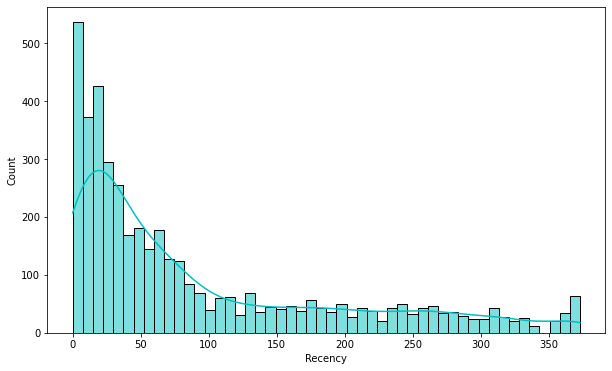

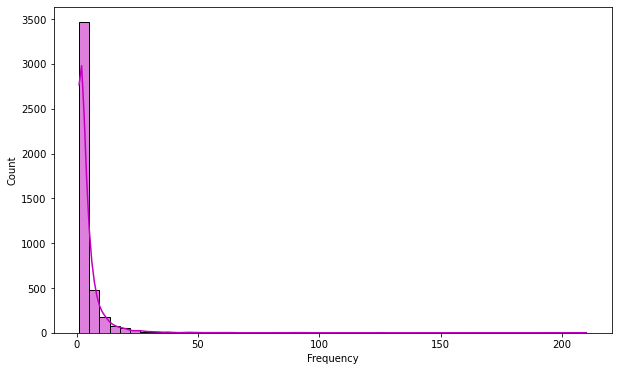

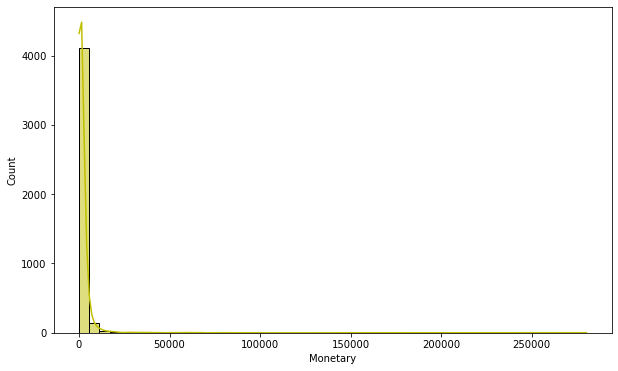

In [29]:
plt.figure(figsize=(10,6))
x1 = rfm['Recency']
ax1 = sns.histplot(x1, kde=True, color='c', bins=50)
plt.figure(figsize=(10,6))
x2 = rfm['Frequency']
ax2 = sns.histplot(x2, kde=True, color='m', bins=50)
plt.figure(figsize=(10,6))
x3 = rfm['Monetary']
ax3 = sns.histplot(x3, kde=True, color='y', bins=50)

### 3.3) RFM_SCORE 

In [30]:
# monetary is excluded
rfm["RFM_SCORE"] = (rfm["recency_score"].astype(str) + 
                    rfm["frequency_score"].astype(str))

In [31]:
rfm.head()

,Customer ID,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,RFM_SCORE
0,12346.0,325,1,77183.60,1,1,5,11
1,12347.0,2,7,4310.00,5,5,5,55
2,12348.0,75,4,1797.24,2,4,4,24
3,12349.0,18,1,1757.55,4,1,4,41
4,12350.0,310,1,334.40,1,1,2,11


## TASK 4: Segmentation 

### 4.1 & 4.2) 

In [32]:
rfm.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer ID,4338.0,15300.408022,1721.808492,12346.00,13813.250,15299.500,16778.75,18287.00
Recency,4338.0,92.059474,100.012264,0.00,17.000,50.000,141.75,373.00
Frequency,4338.0,4.272706,7.706221,1.00,1.000,2.000,5.00,210.00
Monetary,4338.0,2054.270609,8989.229895,3.75,307.415,674.485,1661.74,280206.02


In [33]:
# segmentation mapping
seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At Risk',
    r'[1-2]5': 'Can\'t Loose',
    r'3[1-2]': 'About to Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'
}

In [34]:
rfm["Segment"] = (rfm.recency_score.astype(str) + 
                  rfm.frequency_score.astype(str))
rfm["Segment"] = rfm["Segment"].replace(seg_map, regex=True)

In [35]:
rfm.Segment

0               Hibernating
1                 Champions
2                   At Risk
3                 Promising
4               Hibernating
               ...         
4334            Hibernating
4335            Hibernating
4336    Potential Loyalists
4337              Champions
4338        Loyal Customers
Name: Segment, Length: 4338, dtype: object

In [36]:
rfm[["Segment", "Recency", "Frequency", "Monetary"]].groupby("Segment").agg(["mean", 
                                                                             "median",
                                                                             "count", 
                                                                             "min", 
                                                                             "max"])

Recency                        Frequency               \
                           mean median count min  max       mean median count   
Segment                                                                         
About to Sleep        52.312500     52   352  33   71   1.161932      1   352   
At Risk              152.785835    138   593  72  373   2.878583      3   593   
Can't Loose          131.968254    107    63  72  372   8.380952      7    63   
Champions              5.361769      4   633   0   12  12.417062      8   633   
Hibernating          216.605042    218  1071  72  373   1.101774      1  1071   
Loyal Customers       32.608059     29   819  14   71   6.479853      5   819   
Need Attention        51.427807     51   187  33   71   2.326203      2   187   
New Customers          6.428571      7    42   0   12   1.000000      1    42   
Potential Loyalists   16.398760     17   484   0   32   2.010331      2   484   
Promising             22.510638     22    94  14   32   1.000000      1    94   

                                 Monetary                                     
                    min  max         mean    median count     min        max  
Segment                                                                       
About to Sleep        1    2   471.994375   330.050   352    6.20    6207.67  
At Risk               2    6  1084.535297   678.250   593   52.00   44534.30  
Can't Loose           6   34  2796.155873  2225.970    63   70.02   10254.18  
Champions             3  210  6857.963918  2612.960   633  201.12  280206.02  
Hibernating           1    2   488.643307   296.250  1071    3.75   77183.60  
Loyal Customers       3   63  2864.247791  1740.480   819   36.56  124914.53  
Need Attention        2    3   897.627861   638.060   187    6.90   12601.83  
New Customers         1    1   388.212857   274.505    42   89.94    3861.00  
Potential Loyalists   1    3  1041.222004   521.275   484   20.80  168472.50  
Promising             1    1   294.007979   221.425    94   30.00    1757.55

In [37]:
rfm[rfm["Segment"] == "Need Attention"].head()


,Customer ID,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,RFM_SCORE,Segment
13,12360.0,52,3,2662.06,3,3,5,33,Need Attention
22,12372.0,71,3,1298.04,3,3,4,33,Need Attention
53,12413.0,66,3,758.10,3,3,3,33,Need Attention
91,12456.0,44,3,3181.04,3,3,5,33,Need Attention
152,12536.0,43,3,12601.83,3,3,5,33,Need Attention


In [38]:
rfm[rfm["Segment"] == "About to Sleep"].head()


,Customer ID,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,RFM_SCORE,Segment
10,12357.0,33,1,6207.67,3,1,5,31,About to Sleep
21,12371.0,44,2,1887.96,3,2,4,32,About to Sleep
38,12394.0,63,2,1272.48,3,2,4,32,About to Sleep
40,12397.0,35,2,2409.90,3,2,5,32,About to Sleep
41,12398.0,45,1,1635.66,3,1,4,31,About to Sleep


In [39]:
rfm[rfm["Segment"] == "Need Attention"].head()


,Customer ID,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,RFM_SCORE,Segment
13,12360.0,52,3,2662.06,3,3,5,33,Need Attention
22,12372.0,71,3,1298.04,3,3,4,33,Need Attention
53,12413.0,66,3,758.10,3,3,3,33,Need Attention
91,12456.0,44,3,3181.04,3,3,5,33,Need Attention
152,12536.0,43,3,12601.83,3,3,5,33,Need Attention


In [40]:
import squarify

In [41]:
rfm_counts = rfm[['Recency','Segment']].groupby('Segment').agg({'count'}).rename(columns={"Recency":"Count"})

In [42]:
clr = ["#f94144","#f3722c","#f8961e","#f9844a","#f9c74f","#90be6d","#43aa8b","#4d908e","#577590","#277da1"]

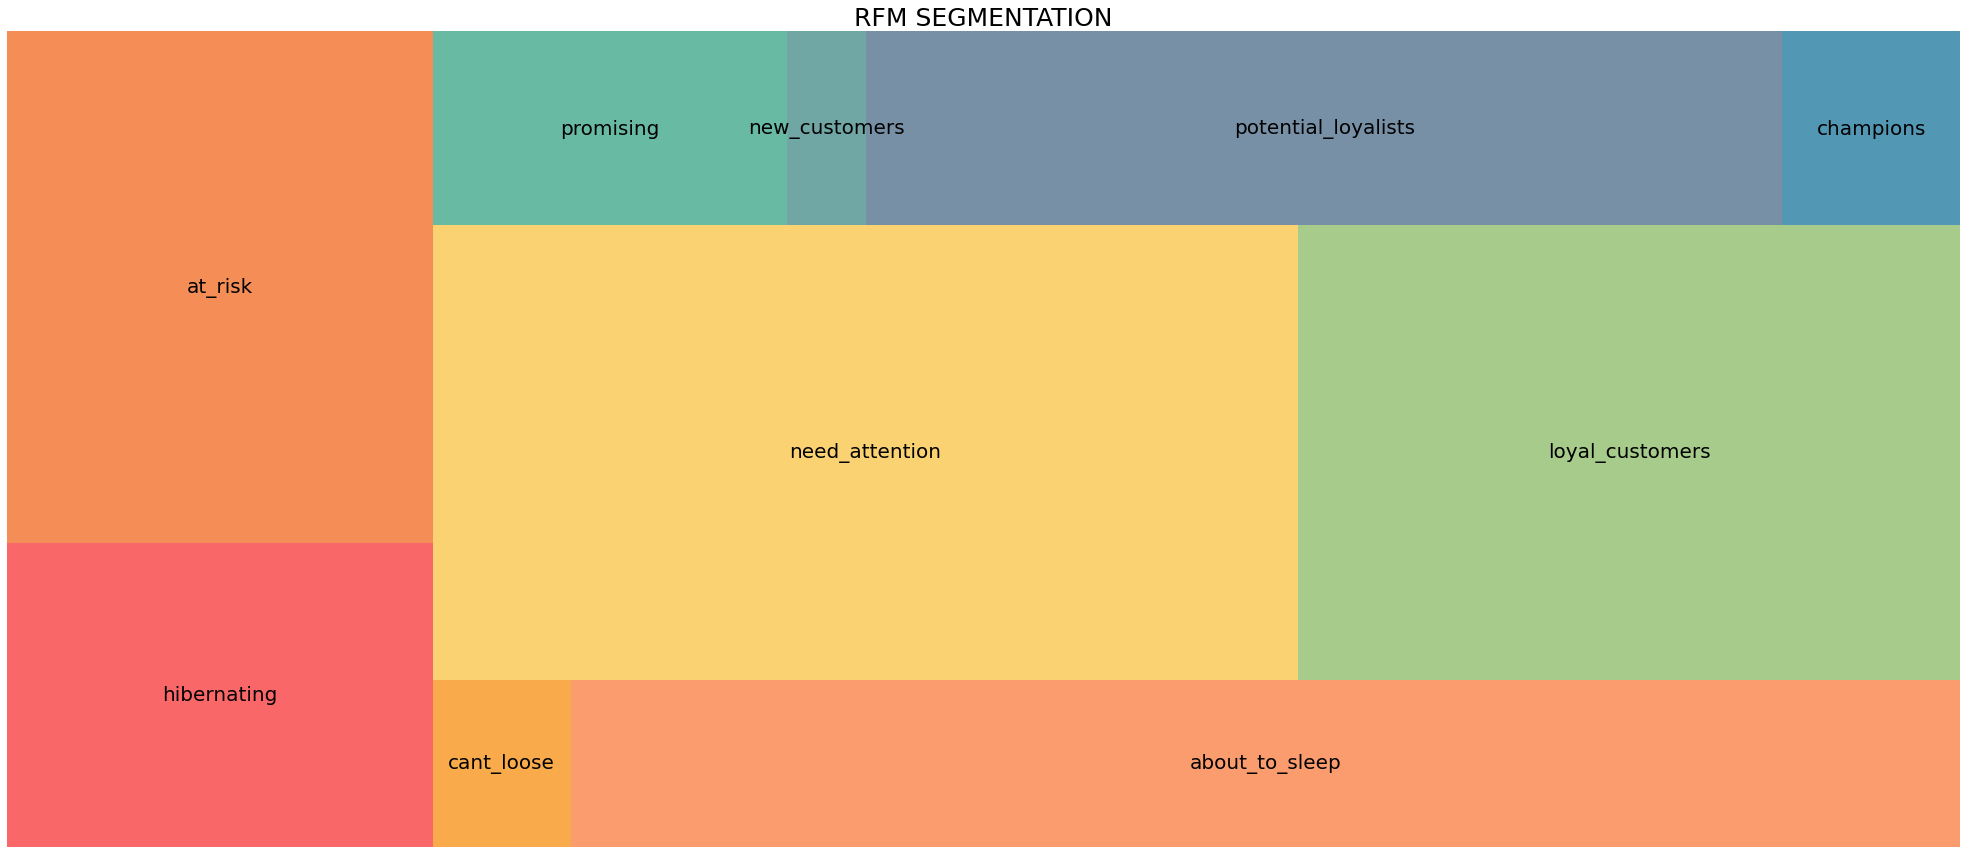

In [43]:
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(35, 15)

squarify.plot(sizes=rfm_counts.values, 
              label=['hibernating',
                     'at_risk',
                     'cant_loose',
                     'about_to_sleep',
                     'need_attention', 
                     'loyal_customers',
                    'promising',
                    'new_customers',
                    'potential_loyalists',
                     'champions'], 
              alpha=0.8, color = clr, text_kwargs={'fontsize':20})
             
plt.title('RFM SEGMENTATION', fontsize = 25)
plt.axis('off')
plt.show()

### 5) Filtering Out Loyal Customers and Attaching out to a New Excel File

In [44]:
loyalCust = pd.DataFrame()
loyalCust["Loyal Customer's ID"] = rfm[rfm["Segment"] == "Loyal Customers"].index
loyalCust.to_csv('loyal_customers.csv', index=False)
loyalCust.head()

,Loyal Customer's ID
0,5
1,12
2,20
3,29
4,34


# K-Means Segmentation 

In [45]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [46]:
rfm_kmeans = rfm[["Recency","Frequency","Monetary","Customer ID"]]

In [47]:
rfm_kmeans = rfm_kmeans.set_index('Customer ID')

In [48]:
rfm_kmeans

,Recency,Frequency,Monetary
Customer ID,,,
12346.0,325,1,77183.60
12347.0,2,7,4310.00
12348.0,75,4,1797.24
12349.0,18,1,1757.55
12350.0,310,1,334.40
...,...,...,...
18280.0,277,1,180.60
18281.0,180,1,80.82
18282.0,7,2,178.05


In [49]:
sc = MinMaxScaler((0, 1))
df_k = sc.fit_transform(rfm_kmeans)
df_k

array([[8.71313673e-01, 0.00000000e+00, 2.75443343e-01],
       [5.36193029e-03, 2.87081340e-02, 1.53683623e-02],
       [2.01072386e-01, 1.43540670e-02, 6.40069761e-03],
       ...,
       [1.87667560e-02, 4.78468900e-03, 6.22050635e-04],
       [8.04289544e-03, 7.17703349e-02, 7.46293026e-03],
       [1.12600536e-01, 9.56937799e-03, 6.54359438e-03]])

In [50]:
kmeans = KMeans()
ssd = []
K = range(1,10)

for k in K:
    kmeans = KMeans(n_clusters=k).fit(df_k)
    ssd.append(kmeans.inertia_)
ssd

[322.16151818122637,
 74.134194709931,
 40.85111795245437,
 27.195621213427298,
 20.586494414489827,
 16.092052376297048,
 12.782925279515972,
 10.878647359726497,
 9.556853698267156]

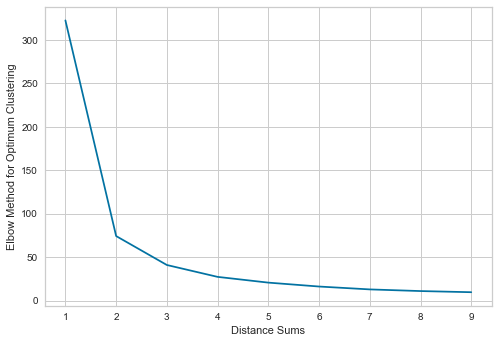

In [51]:
plt.plot(K, ssd, "bx-")
plt.xlabel("Distance Sums")
plt.ylabel("Elbow Method for Optimum Clustering")
plt.show()

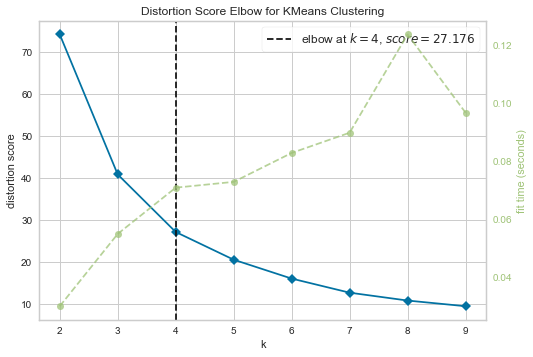

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [52]:
kmeans = KMeans()
elbow = KElbowVisualizer(kmeans, k=(2,10))
elbow.fit(df_k)
elbow.show()

In [53]:
kmeans = KMeans(n_clusters=elbow.elbow_value_).fit(df_k)

In [54]:
clusters = kmeans.labels_
clusters

array([1, 0, 3, ..., 0, 0, 0])

In [55]:
pd.DataFrame({"Customer ID": rfm_kmeans.index, "Clusters": clusters})

,Customer ID,Clusters
0,12346.0,1
1,12347.0,0
2,12348.0,3
3,12349.0,0
4,12350.0,1
...,...,...
4333,18280.0,1
4334,18281.0,2
4335,18282.0,0
4336,18283.0,0


In [56]:
rfm_kmeans["Cluster Amount"] = clusters
rfm_kmeans["Cluster Amount"] = rfm_kmeans["Cluster Amount"] + 1
rfm_kmeans.head()

,Recency,Frequency,Monetary,Cluster Amount
Customer ID,,,,
12346.0,325,1,77183.60,2
12347.0,2,7,4310.00,1
12348.0,75,4,1797.24,4
12349.0,18,1,1757.55,1
12350.0,310,1,334.40,2


In [57]:
rfm_groupby = rfm_kmeans.groupby("Cluster Amount").agg({"Cluster Amount": "count"})
rfm_groupby.head()

,Cluster Amount
Cluster Amount,
1,2128
2,503
3,613
4,1094


In [58]:
rfm_kmeans.groupby("Cluster Amount").agg(np.mean)

,Recency,Frequency,Monetary
Cluster Amount,,,
1,18.686560,6.498590,3325.922078
2,307.779324,1.345924,562.916123
3,190.567700,1.880914,731.068713
4,80.400366,2.628885,1007.835276


[]

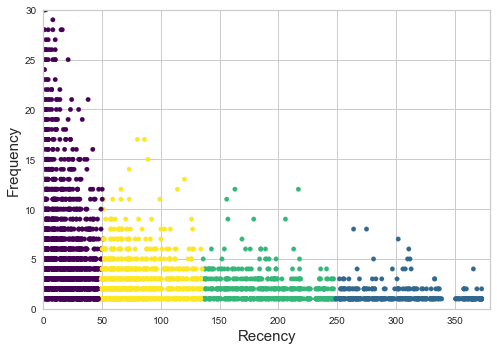

In [59]:
plt.scatter(rfm_kmeans['Recency'], rfm_kmeans['Frequency'], c=clusters, s=20, cmap='viridis')
plt.xlabel('Recency', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.xlim([0, 380])
plt.ylim([0, 30])
plt.plot()